In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(font_scale=2.5)
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

In [2]:
df_train=pd.read_csv('C:/Users/cod/Desktop/ST/train.csv')
df_test=pd.read_csv('C:/Users/cod/Desktop/ST/test.csv')
submission=pd.read_csv('C:/Users/cod/Desktop/ST/sample_submission.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

<AxesSubplot:>

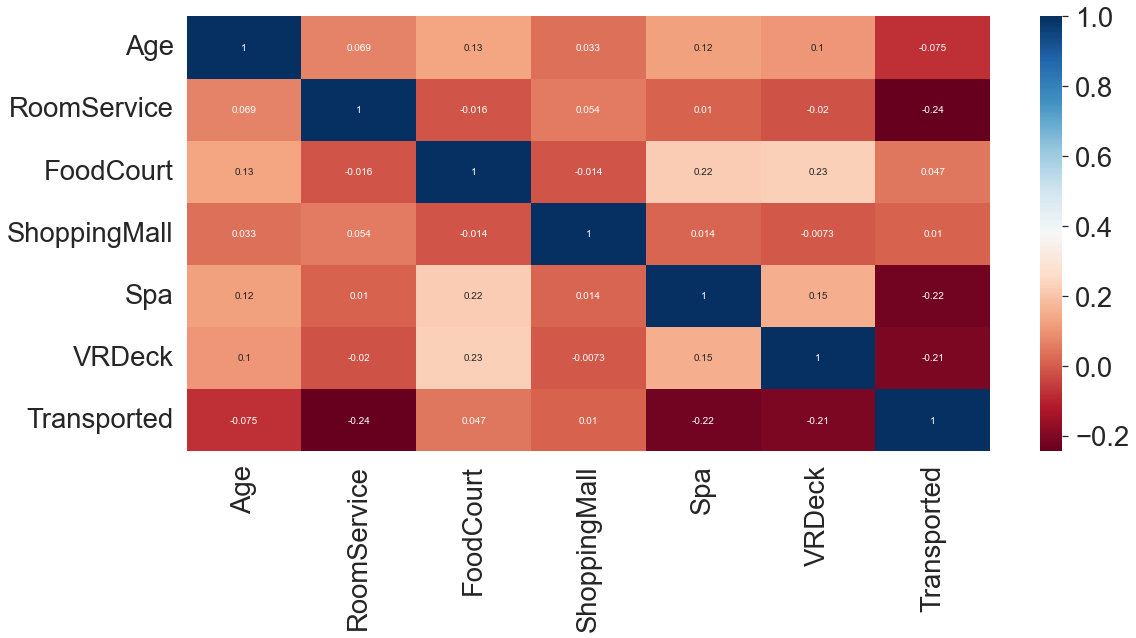

In [5]:
corrmat=df_train.corr()
plt.figure(figsize=(18,8))

sns.heatmap(df_train.corr(),annot=True,cmap='RdBu')

In [6]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
df_train['Transported']=df_train['Transported'].astype('object')

In [8]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
df_test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [10]:
target=df_train.Transported
df_train_idx=df_train.index
df_train.drop(['Transported','Cabin','RoomService','ShoppingMall','FoodCourt','Spa','Name'],axis=1,inplace=True)

In [11]:
df_test_idx=df_test.index
df_test.drop(['Cabin','RoomService','ShoppingMall','FoodCourt','Spa','Name'],axis=1,inplace=True)

In [12]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [13]:
df_st=pd.concat((df_train,df_test))

In [14]:
#가족별로 나누는 조치가 필요함.
df_train['Party']=df_train.PassengerId.str.extract('_\d+(\d)')

In [15]:
df_train['Party'].describe()

count     8693
unique       8
top          1
freq      6217
Name: Party, dtype: object

In [17]:
for i in range(df_train['Party'].shape[0]):
    if df_train['Party'][i]=='01':
        df_train['Party'][i]=1
    else:
        if df_train['Party'][i]=='02':
            df_train['Party'][i]=2
            df_train['Party'][i-1]=2
        else:
            if df_train['Party'][i]=='03':
                df_train['Party'][i]=3
                df_train['Party'][i-1]=3
                df_train['Party'][i-2]=3
            else:
                if df_train['Party'][i]=='04':
                    df_train['Party'][i]=4
                    df_train['Party'][i-1]=4
                    df_train['Party'][i-2]=4
                    df_train['Party'][i-3]=4
                else:
                    if df_train['Party'][i]=='05':
                        df_train['Party'][i]=5
                        df_train['Party'][i-1]=5
                        df_train['Party'][i-2]=5
                        df_train['Party'][i-3]=5
                        df_train['Party'][i-4]=5
                    else:
                        if df_train['Party'][i]=='06':
                            df_train['Party'][i]=6
                            df_train['Party'][i-1]=6
                            df_train['Party'][i-2]=6
                            df_train['Party'][i-3]=6
                            df_train['Party'][i-4]=6
                            df_train['Party'][i-5]=6
                        else:
                            if df_train['Party'][i]=='07':
                                df_train['Party'][i]=7
                                df_train['Party'][i-1]=7
                                df_train['Party'][i-2]=7
                                df_train['Party'][i-3]=7
                                df_train['Party'][i-4]=7
                                df_train['Party'][i-5]=7
                                df_train['Party'][i-6]=7
                            else:
                                if df_train['Party'][i]=='08':
                                    df_train['Party'][i]=8
                                    df_train['Party'][i-1]=8
                                    df_train['Party'][i-2]=8
                                    df_train['Party'][i-3]=8
                                    df_train['Party'][i-4]=8
                                    df_train['Party'][i-5]=8
                                    df_train['Party'][i-6]=8
                                    df_train['Party'][i-7]=8
  

In [18]:
df_train.Party

0       1
1       1
2       1
3       2
4       1
       ..
8688    1
8689    1
8690    1
8691    1
8692    2
Name: Party, Length: 8693, dtype: object

In [15]:
df_st

,HomePlanet,CryoSleep,Destination,Age,VIP,VRDeck
PassengerId,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,44.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,49.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,193.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,2.0
...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0
9269_01,Earth,False,TRAPPIST-1e,42.0,False,144.0
9271_01,Mars,True,55 Cancri e,NaN,False,0.0


In [16]:
for col in df_st.columns:
    x=df_st[col].isnull().sum()/df_st[col].shape[0]*100
    print('{:<10} null percentage : {:.2f}'.format(col,x))

HomePlanet null percentage : 2.22
CryoSleep  null percentage : 2.39
Destination null percentage : 2.11
Age        null percentage : 2.08
VIP        null percentage : 2.28
VRDeck     null percentage : 2.07


In [17]:
df_st_obj=df_st.select_dtypes(include='object')
df_st_num=df_st.select_dtypes(exclude='object')

In [18]:
df_st_obj_dum=pd.get_dummies(df_st_obj,drop_first=True)

In [19]:
df_st_obj_dum

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
PassengerId,,,,,,
0001_01,1,0,0,0,1,0
0002_01,0,0,0,0,1,0
0003_01,1,0,0,0,1,1
0003_02,1,0,0,0,1,0
0004_01,0,0,0,0,1,0
...,...,...,...,...,...,...
9266_02,0,0,1,0,1,0
9269_01,0,0,0,0,1,0
9271_01,0,1,1,0,0,0


In [20]:
idx=df_st_obj_dum.index

In [21]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()
imputer.fit(df_st_num)
df_st_num_=imputer.transform(df_st_num)

In [22]:
df_st_num=pd.DataFrame(df_st_num_,columns=df_st_num.columns)

In [23]:
df_st_num.set_index(idx,inplace=True)

In [24]:
df_st=pd.merge(df_st_obj_dum,df_st_num,left_index=True,right_index=True)

In [25]:
df_st

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,VRDeck
PassengerId,,,,,,,,
0001_01,1,0,0,0,1,0,39.000000,0.0
0002_01,0,0,0,0,1,0,24.000000,44.0
0003_01,1,0,0,0,1,1,58.000000,49.0
0003_02,1,0,0,0,1,0,33.000000,193.0
0004_01,0,0,0,0,1,0,16.000000,2.0
...,...,...,...,...,...,...,...,...
9266_02,0,0,1,0,1,0,34.000000,0.0
9269_01,0,0,0,0,1,0,42.000000,144.0
9271_01,0,1,1,0,0,0,28.771969,0.0


In [26]:
df_train=df_st[:len(df_train)]
df_test=df_st[len(df_train):]

In [27]:
df_train.Transported=target

In [28]:
df_train

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,VRDeck
PassengerId,,,,,,,,
0001_01,1,0,0,0,1,0,39.0,0.0
0002_01,0,0,0,0,1,0,24.0,44.0
0003_01,1,0,0,0,1,1,58.0,49.0
0003_02,1,0,0,0,1,0,33.0,193.0
0004_01,0,0,0,0,1,0,16.0,2.0
...,...,...,...,...,...,...,...,...
9276_01,1,0,0,0,0,1,41.0,74.0
9278_01,0,0,1,1,0,0,18.0,0.0
9279_01,0,0,0,0,1,0,26.0,0.0


In [29]:
df_test

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,VRDeck
PassengerId,,,,,,,,
0013_01,0,0,1,0,1,0,27.000000,0.0
0018_01,0,0,0,0,1,0,19.000000,0.0
0019_01,1,0,1,0,0,0,31.000000,0.0
0021_01,1,0,0,0,1,0,38.000000,585.0
0023_01,0,0,0,0,1,0,20.000000,0.0
...,...,...,...,...,...,...,...,...
9266_02,0,0,1,0,1,0,34.000000,0.0
9269_01,0,0,0,0,1,0,42.000000,144.0
9271_01,0,1,1,0,0,0,28.771969,0.0
